In [9]:
import re

log_files_path = [
    # "logs/2024-08-28_15-07-55__f2b4c6b0-0255-474c-a8b1-42c328a0e54c.log",
    # "logs/2024-08-28_15-08-24__fee90383-fd7f-4424-9bd8-ecfb2ff947eb.log",
    # "logs/2024-08-28_15-09-06__ed06aa89-c254-4728-a142-319f49ce210e.log",
    # "logs/2024-08-28_15-12-48__c7a7097e-bb9f-4117-aaef-445b95fc6f28.log",
    # "logs/2024-08-28_15-13-24__a74ca14e-aa84-46bb-a257-02e890b48a4c.log",
    # "logs/2024-08-28_15-15-11__aeb6b451-6f57-46b4-b15c-e9643a4674a7.log",
    # "logs/2024-08-28_15-21-41__55c9ecb1-a53e-4aef-8697-7d49d3493d72.log",
    # "logs/2024-08-28_15-23-32__02fdad84-d2e7-45c8-802d-4505b7306969.log",
    # "logs/2024-08-28_15-28-33__7a1384de-04ef-44d5-bf87-3a333c5ceb7d.log",
    # "logs/2024-08-28_15-38-42__52cc5a31-f257-4f89-a028-da619012b2e4.log",
    # "logs/2024-08-28_16-01-50__14d09ef6-bbb3-4ee5-abc9-b80d3110b520.log",
    # "logs/2024-08-28_16-07-01__847f485c-6f2a-4de6-801d-73d17ea5171d.log",
    # "logs/2024-08-28_20-20-06__ac6633e4-b918-47ec-a107-831e3906bff3.log",


    "__old_without_transform/logs/2024-08-27_12-00-28__173d966d-e146-49ea-b7b5-d1cbacc21971.log",
    "__old_without_transform/logs/2024-08-27_12-05-33__9cd4b733-d5c0-438f-9c3a-b6d67a74c7b2.log",
    "__old_without_transform/logs/2024-08-27_12-06-47__bafb7d21-3412-4099-8931-2a4fb1c0ebf4.log",
    "__old_without_transform/logs/2024-08-27_13-34-55__8efcd24f-0ada-4d20-9c6a-3257270dd69d.log",
    "__old_without_transform/logs/2024-08-27_13-54-16__70c52207-3e42-43cb-9687-2312ee240cf6.log",
    "__old_without_transform/logs/2024-08-27_13-55-58__da994edd-3998-4a95-8b9d-caff36a18e6c.log",
    "__old_without_transform/logs/2024-08-27_13-56-52__0c726740-86c7-41bf-b043-bcdf4310ddc0.log",
    "__old_without_transform/logs/2024-08-27_14-04-14__82d104cf-68a2-4d98-a4bb-32f36d6d1d35.log",
    "__old_without_transform/logs/2024-08-27_14-22-04__4d9b698c-c963-44c1-a7fd-a1b1461bab43.log",
    "__old_without_transform/logs/2024-08-27_14-51-53__c33663d5-5e4e-4b16-b0f7-46ddf8b57adc.log",
    "__old_without_transform/logs/2024-08-27_14-57-26__e56f3903-97aa-4e1c-a483-f25c3cd119ff.log",
    "__old_without_transform/logs/2024-08-28_10-30-11__1d0c0054-32fe-47e5-9e3d-2785cf5c1cc2.log",
    "__old_without_transform/logs/2024-08-28_10-42-35__14735a8a-b539-4fc7-b849-0002632c11bc.log",
    "__old_without_transform/logs/2024-08-28_10-42-54__89f1b7aa-a1e9-4c73-981d-57cdacc9c879.log",
    "__old_without_transform/logs/2024-08-28_10-44-11__8a667557-7f03-438c-be91-f1081b85a902.log",
    "__old_without_transform/logs/2024-08-28_10-44-28__6e91cfa9-8050-44e5-8dc9-34e45b3bb677.log",
    "__old_without_transform/logs/2024-08-28_10-51-16__fdfd7bd6-e05f-47f5-b75d-97c0ed8adb2b.log",
    "__old_without_transform/logs/2024-08-28_10-51-36__2197cdd7-3611-4fae-81a0-cd619320064b.log",
    "__old_without_transform/logs/2024-08-28_10-54-09__84545b4a-aac9-4b58-9ced-c5ea83a56a20.log",
    "__old_without_transform/logs/2024-08-28_10-54-45__eb5fedad-159a-4b66-b150-70146ffe5cad.log",
    "__old_without_transform/logs/2024-08-28_11-12-09__ccf57564-b1ea-4177-b925-b88e4d0aab0c.log",
    "__old_without_transform/logs/2024-08-28_11-12-36__504c6133-f3e7-4756-b2af-59faf35da61d.log",
    "__old_without_transform/logs/2024-08-28_11-13-22__80a4a654-fe54-4f00-bdf3-a7a1a2beccd5.log",
    "__old_without_transform/logs/2024-08-28_11-15-17__df8d42b7-260c-4f0f-85fa-0c06ba7e1777.log",

]


log_data = {}


for log_file_path in log_files_path:

    log_fields_re = {
        "dataset": r"dataset: (.*)",
        "model": r"model: (.*)",
        "num_epochs": r"num_epochs: (.*)",
        "learning_rate": r"learning_rate: (.*)",
        "seed": r"seed: (.*)",
        "batch_size": r"batch_size: (.*)",
        "load_dataset_all_in_ram": r"load_dataset_all_in_ram: (.*)",
        "num_workers": r"num_workers: (.*)",
        "model": r"model: (.*)",

    }

    with open(log_file_path, "r") as f:
        lines = f.readlines()
        log_id = re.search(r"Log ID: (.*)", lines[0]).group(1)
        log_data[log_id] = {}
        log_data[log_id]["log_id"] = log_id
        log_data[log_id]["date"] = re.search(r"Date: (.*)", lines[1]).group(1)

        for field, regex in log_fields_re.items():
            for line in lines:
                search = re.search(regex, line)
                if search is not None:
                    log_data[log_id][field] = search.group(1)
                    break  # since we've found the item, no need to scan remaining lines

    log_fields_re = {
        "Train Loss": r"Epoch \[(\d+)/\d+\] \| Train Loss: (.*)",
        "Train Accuracy": r"EPOCH \[(\d+)/\d+\] \| Train Accuracy: (.*)",
        "Validation Loss": r"EPOCH \[(\d+)/\d+\] \| Validation Loss: (.*)",
        "Validation Accuracy": r"EPOCH \[(\d+)/\d+\] \| Validation Accuracy: (.*)",
    }

    with open(log_file_path, "r") as f:
        lines = f.readlines()
        log_id = re.search(r"Log ID: (.*)", lines[0]).group(1)

        epochs_data = {}
        for field, regex in log_fields_re.items():
            for line in lines:
                search = re.search(regex, line)
                if search is not None:
                    try:
                        epoch, value = search.groups()
                        if epoch not in epochs_data:
                            epochs_data[epoch] = {}
                        epochs_data[epoch][field] = float(value)
                    except ValueError:
                        pass
        log_data[log_id]["epochs"] = epochs_data

log_data

# get id, model, dataset together as table
for k in log_data.keys():
    print(k, log_data[k]["model"], log_data[k]["dataset"], log_data[k].keys())

2024-08-27_12-00-28__173d966d-e146-49ea-b7b5-d1cbacc21971 cnn cifar10 dict_keys(['log_id', 'date', 'dataset', 'model', 'num_epochs', 'learning_rate', 'seed', 'batch_size', 'load_dataset_all_in_ram', 'num_workers', 'epochs'])
2024-08-27_12-05-33__9cd4b733-d5c0-438f-9c3a-b6d67a74c7b2 cnn cifar100 dict_keys(['log_id', 'date', 'dataset', 'model', 'num_epochs', 'learning_rate', 'seed', 'batch_size', 'load_dataset_all_in_ram', 'num_workers', 'epochs'])
2024-08-27_12-06-47__bafb7d21-3412-4099-8931-2a4fb1c0ebf4 densenet cifar100 dict_keys(['log_id', 'date', 'dataset', 'model', 'num_epochs', 'learning_rate', 'seed', 'batch_size', 'load_dataset_all_in_ram', 'num_workers', 'epochs'])
2024-08-27_13-34-55__8efcd24f-0ada-4d20-9c6a-3257270dd69d cnn_batchnorm cifar100 dict_keys(['log_id', 'date', 'dataset', 'model', 'num_epochs', 'learning_rate', 'seed', 'batch_size', 'load_dataset_all_in_ram', 'num_workers', 'epochs'])
2024-08-27_13-54-16__70c52207-3e42-43cb-9687-2312ee240cf6 cnn_batchnorm cifar10 di

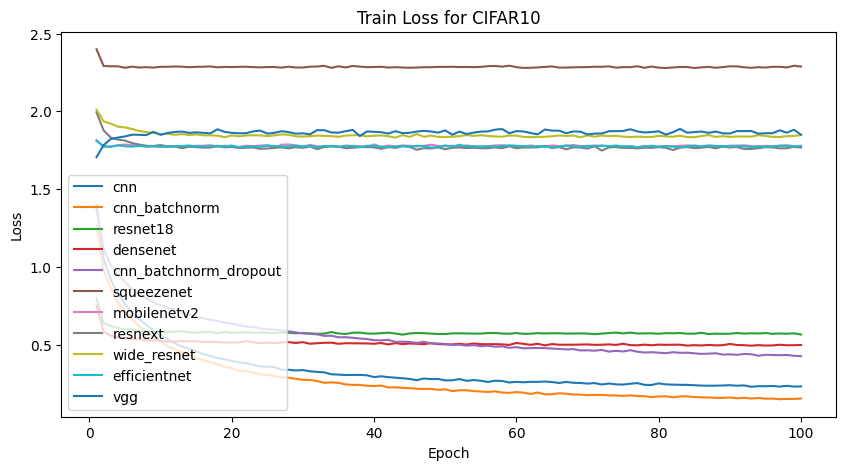

In [10]:
# now as pd dataframe
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(log_data).T
df = df.drop(columns=["epochs"])
df = df.reset_index(drop=True)
df = df.rename(columns={"log_id": "ID"})
df


# now plot train loss for cifar 10, label using models
# first get the data for each model
data = {}
for k in log_data.keys():
    if log_data[k]["dataset"] == "cifar10":
        model = log_data[k]["model"]
        if model not in data:
            data[model] = {}
        for epoch, values in log_data[k]["epochs"].items():
            epoch = int(epoch)
            if epoch not in data[model]:
                data[model][epoch] = {}
            for field, value in values.items():
                if field not in data[model][epoch]:
                    data[model][epoch][field] = value


# now plot
# rectangle fig size
plt.figure(figsize=(10, 5))
for model, epochs in data.items():
    x = [int(epoch) for epoch in epochs.keys()]
    y = [epoch["Train Loss"] for epoch in epochs.values()]
    plt.plot(x, y, label=model)

plt.legend()
plt.title("Train Loss for CIFAR10")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

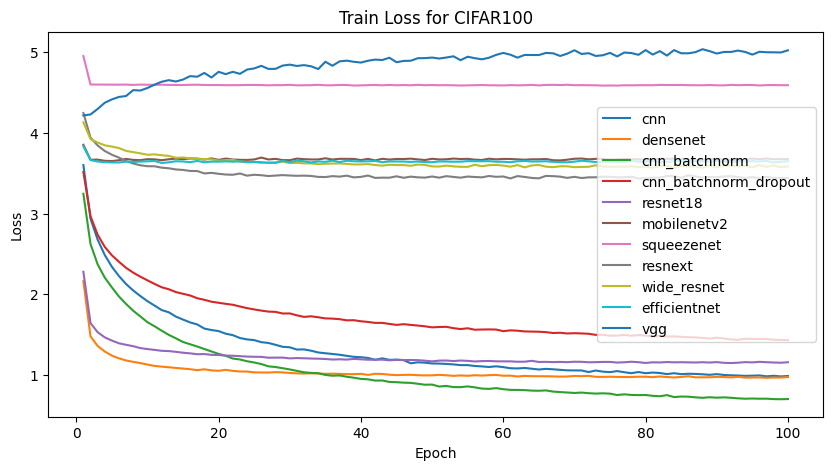

In [11]:
# now plot train loss for cifar 100, label using models

data = {}

for k in log_data.keys():
    if log_data[k]["dataset"] == "cifar100":
        model = log_data[k]["model"]
        if model not in data:
            data[model] = {}
        for epoch, values in log_data[k]["epochs"].items():
            epoch = int(epoch)
            if epoch not in data[model]:
                data[model][epoch] = {}
            for field, value in values.items():
                if field not in data[model][epoch]:
                    data[model][epoch][field] = value

# now plot
# rectangle fig size
plt.figure(figsize=(10, 5))
for model, epochs in data.items():
    x = [int(epoch) for epoch in epochs.keys()]
    y = [epoch["Train Loss"] for epoch in epochs.values()]
    plt.plot(x, y, label=model)

plt.legend()
plt.title("Train Loss for CIFAR100")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

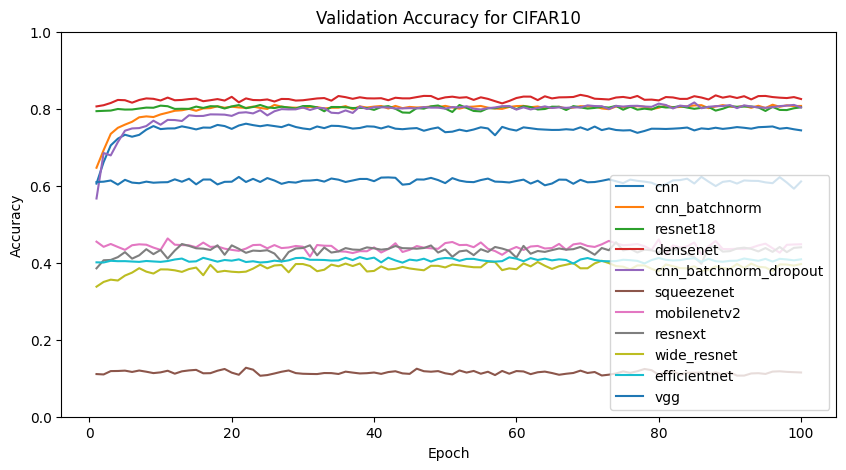

In [12]:
# now print val accuracy for cifar 10
data = {}

for k in log_data.keys():
    if log_data[k]["dataset"] == "cifar10":
        model = log_data[k]["model"]
        if model not in data:
            data[model] = {}
        for epoch, values in log_data[k]["epochs"].items():
            epoch = int(epoch)
            if epoch not in data[model]:
                data[model][epoch] = {}
            for field, value in values.items():
                if field not in data[model][epoch]:
                    data[model][epoch][field] = value

# now plot
# rectangle fig size
plt.figure(figsize=(10, 5))
for model, epochs in data.items():
    x = [int(epoch) for epoch in epochs.keys()]
    y = [epoch["Validation Accuracy"] for epoch in epochs.values()]
    plt.plot(x, y, label=model)
    
plt.legend()
plt.title("Validation Accuracy for CIFAR10")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
# y-axis 0 to 1
plt.ylim(0, 1)
plt.show()

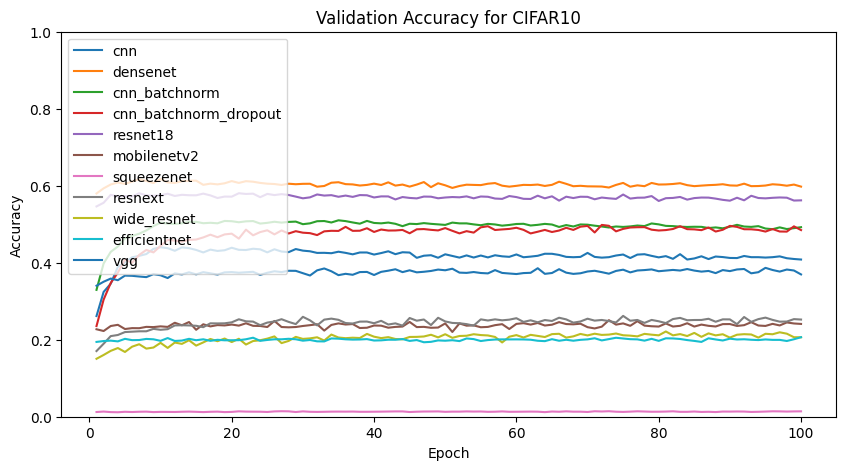

In [13]:
# now print val accuracy for cifar 100
data = {}

for k in log_data.keys():
    if log_data[k]["dataset"] == "cifar100":
        model = log_data[k]["model"]
        if model not in data:
            data[model] = {}
        for epoch, values in log_data[k]["epochs"].items():
            epoch = int(epoch)
            if epoch not in data[model]:
                data[model][epoch] = {}
            for field, value in values.items():
                if field not in data[model][epoch]:
                    data[model][epoch][field] = value

# now plot
# rectangle fig size
plt.figure(figsize=(10, 5))
for model, epochs in data.items():
    x = [int(epoch) for epoch in epochs.keys()]
    y = [epoch["Validation Accuracy"] for epoch in epochs.values()]
    plt.plot(x, y, label=model)
    
plt.legend()
plt.title("Validation Accuracy for CIFAR10")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
# y-axis 0 to 1
plt.ylim(0, 1)
plt.show()

cnn|cnn_batchnorm|cnn_batchnorm_dropout|densenet|efficientnet|mobilenetv2|resnet18|resnext|squeezenet|vgg|wide_resnet


C:\Users\megah\AppData\Local\Temp\ipykernel_10872\1739695820.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([i.get_text()[:MAX_LENGTH] + "\n" + i.get_text()[MAX_LENGTH:] if len(i.get_text()) > MAX_LENGTH else i.get_text() for i in x])


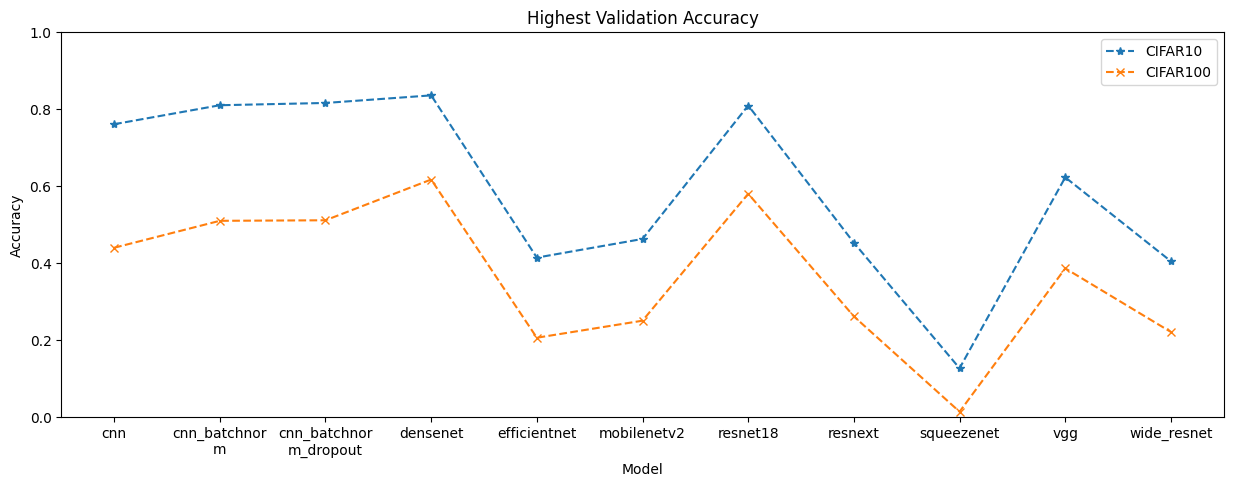

In [14]:
# now get highest validation accuracy for cifar 10 and cifar 100, plot them as line plot together
highest_val_acc_cifar10 = {}

for k in log_data.keys():
    if log_data[k]["dataset"] == "cifar10":
        model = log_data[k]["model"]
        if model not in highest_val_acc_cifar10:
            highest_val_acc_cifar10[model] = 0
        for epoch, values in log_data[k]["epochs"].items():
            if values["Validation Accuracy"] > highest_val_acc_cifar10[model]:
                highest_val_acc_cifar10[model] = values["Validation Accuracy"]

highest_val_acc_cifar100 = {}

for k in log_data.keys():
    if log_data[k]["dataset"] == "cifar100":
        model = log_data[k]["model"]
        if model not in highest_val_acc_cifar100:
            highest_val_acc_cifar100[model] = 0
        for epoch, values in log_data[k]["epochs"].items():
            if values["Validation Accuracy"] > highest_val_acc_cifar100[model]:
                highest_val_acc_cifar100[model] = values["Validation Accuracy"]

# now plot
# rectangle fig size
plt.figure(figsize=(15, 5))
(x, y) = zip(*highest_val_acc_cifar10.items())
x, y = zip(*sorted(zip(x, y)))
plt.plot(x, y, label="CIFAR10", linestyle="--", marker="*")

(x, y) = zip(*highest_val_acc_cifar100.items())
(x, y) = zip(*sorted(zip(x, y)))
plt.plot(x, y, label="CIFAR100", linestyle="--", marker="x")

plt.legend()
plt.title("Highest Validation Accuracy")
plt.xlabel("Model")
plt.ylabel("Accuracy")
# set x-axis label max length = 10, for string labels longer than 10, make it 2 lines, do not rotate

MAX_LENGTH = 12
x = plt.gca().get_xticklabels()

# get all xticks as list
print("|".join([i.get_text() for i in x]))

plt.gca().set_xticklabels([i.get_text()[:MAX_LENGTH] + "\n" + i.get_text()[MAX_LENGTH:] if len(i.get_text()) > MAX_LENGTH else i.get_text() for i in x])

# y-axis 0 to 1
plt.ylim(0, 1)
plt.show()